In [ ]:
!pip install Pillow


In [ ]:
!pip install tensorflow


In [ ]:
!pip install keras

In [ ]:
!pip install torch torchvision torchaudio

In [ ]:
#data handling
import numpy as np
import pandas as pd
import math

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#image handling
import cv2
import os
import io

#for file handling and preprocessing
from PIL import Image
import matplotlib.image as mpimg
import zipfile
import random

# Warnings
import warnings
warnings.filterwarnings('ignore')

#importing pytorch
from torchvision.datasets import ImageFolder
import numpy as np
import os
import time
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import VGG16, ResNet50, MobileNet, InceptionV3, EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
#importing tensorflow
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.applications import VGG16, ResNet50, MobileNet, InceptionV3, EfficientNetB0
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.mobilenet import preprocess_input as mobilenet_preprocess
from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_preprocess
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from PIL import Image

This comprehensive script:

1.Prepares data with augmentation

2.Defines CNN from scratch and transfer learning models cleanly with preprocessing

3.Uses callbacks to save best model and early-stop training

4.Plots training/validation accuracy and loss with messages

5.Evaluates test set with classification report and confusion matrix, printing status messages

6.Prints clear action/timing messages throughout for easy tracking and reuse

In [ ]:
# =========================================================
#  FISH IMAGE CLASSIFICATION PROJECT
# =========================================================
# Deep Learning | TensorFlow/Keras | Transfer Learning | Streamlit Deployment
# =========================================================

#upload zip file
Zipfile_path='/content/Dataset.zip'

#extract path
Extract_path='/content/Dataset'

#to extract all Zip file
with zipfile.ZipFile(Zipfile_path, 'r') as zip_ref:
    zip_ref.extractall(Extract_path)

print(f"Unzipped file path: {Extract_path}")

Unzipped file path: /content/Dataset


In [ ]:
# Verify Dataset Structure

for folder in os.listdir('/content/Dataset'):
    print(folder)

images.cv_jzk6llhf18tm3k0kyttxz


In [ ]:
# ============ 2. DATA PATHS AND SETTINGS ============
data_paths = {
    "Train": "/content/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train",
    "Validation": "/content/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/val",
    "Test": "/content/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/test"
}

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 15

print("✅ Dataset paths and parameters configured.\n")


✅ Dataset paths and parameters configured.



In [ ]:
# ============ 3. DATA PREPROCESSING & AUGMENTATION ============
print("🔄 Preparing data with augmentation...")

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    data_paths["Train"],
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = val_test_datagen.flow_from_directory(
    data_paths["Validation"],
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    data_paths["Test"],
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

num_classes = len(train_generator.class_indices)
print(f"✅ Data generators created successfully with {num_classes} classes.\n")


🔄 Preparing data with augmentation...
Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.
✅ Data generators created successfully with 11 classes.



VISUALIZE

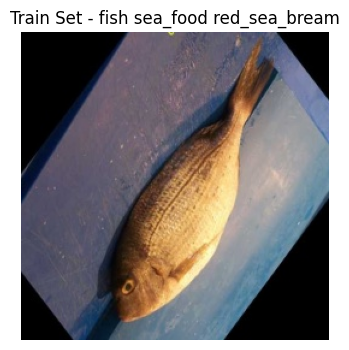

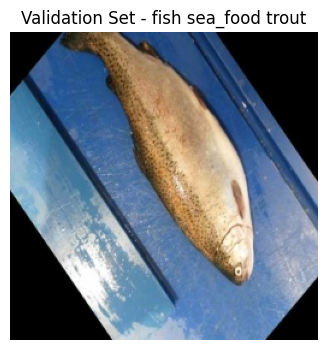

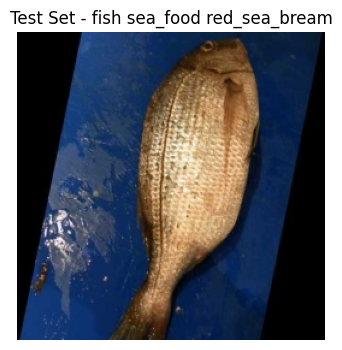

In [ ]:
#Visualize Sample Images


data_paths = {
    "Train": "/content/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train",
    "Validation": "/content/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/val",
    "Test": "/content/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/test"
}

for set_name, path in data_paths.items():
    classes = os.listdir(path)
    class_name = random.choice(classes)
    img_dir = os.path.join(path, class_name)
    img_file = random.choice(os.listdir(img_dir))
    img_path = os.path.join(img_dir, img_file)

    img = mpimg.imread(img_path)
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.title(f"{set_name} Set - {class_name}")
    plt.axis("off")
    plt.show()

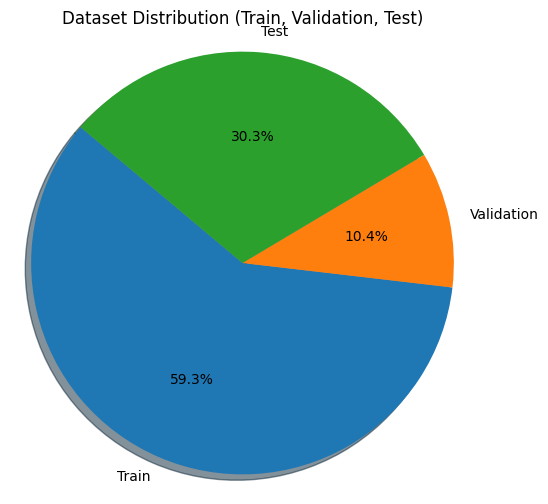

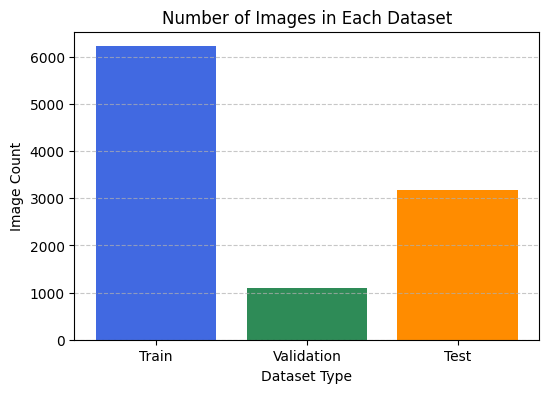

In [ ]:
#Visualize Class Distribution

data_paths = {
    "Train": "/content/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train",
    "Validation": "/content/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/val",
    "Test": "/content/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/test"
}

# Count number of images in each dataset
dataset_counts = {set_name: sum(len(files) for _, _, files in os.walk(path))
                  for set_name, path in data_paths.items()}

# Create Pie Chart for dataset distribution
plt.figure(figsize=(6, 6))
plt.pie(dataset_counts.values(), labels=dataset_counts.keys(), autopct='%1.1f%%',
        startangle=140, shadow=True)
plt.title('Dataset Distribution (Train, Validation, Test)')
plt.axis('equal')
plt.show()

# Create Bar Chart for dataset distribution
plt.figure(figsize=(6, 4))
plt.bar(dataset_counts.keys(), dataset_counts.values(), color=['royalblue', 'seagreen', 'darkorange'])
plt.title('Number of Images in Each Dataset')
plt.xlabel('Dataset Type')
plt.ylabel('Image Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


===== Train Dataset =====



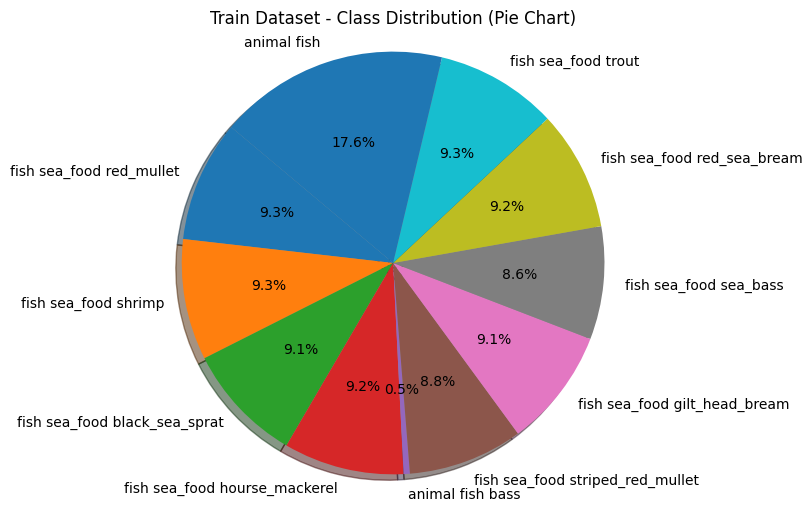

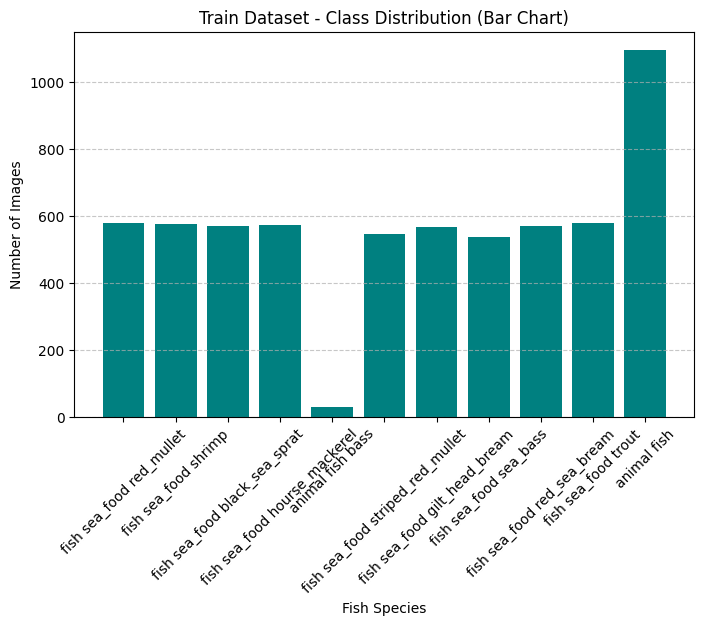



===== Validation Dataset =====



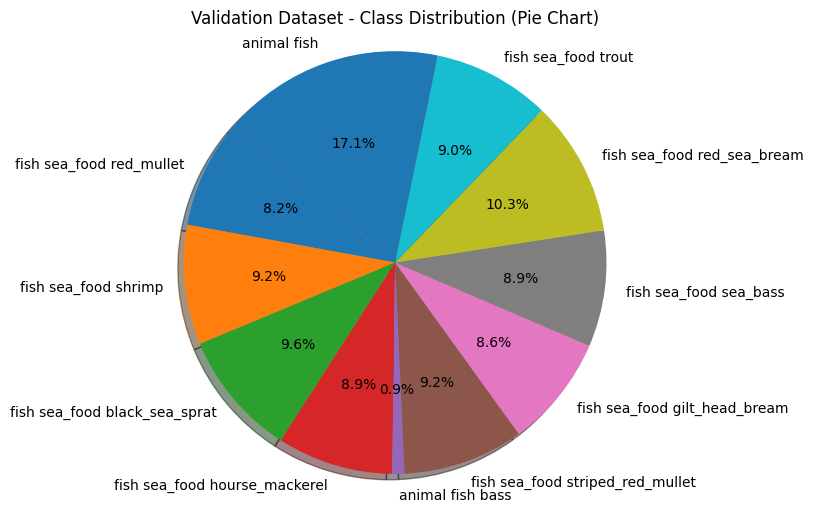

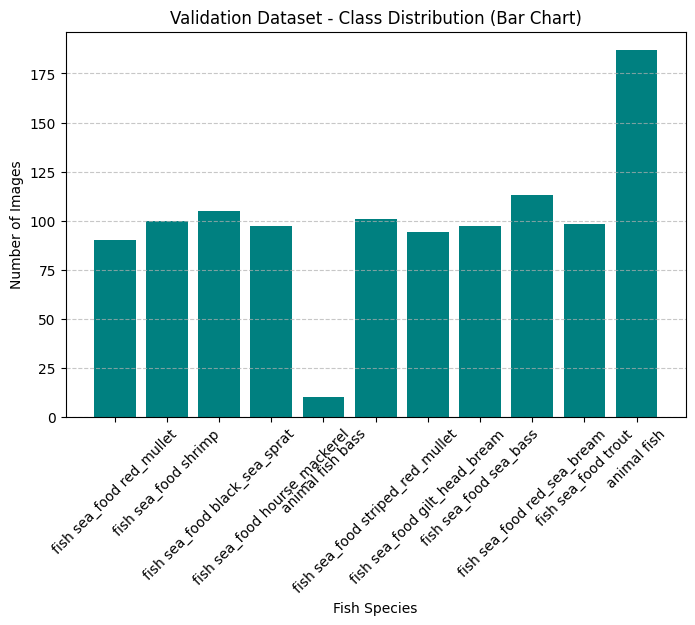



===== Test Dataset =====



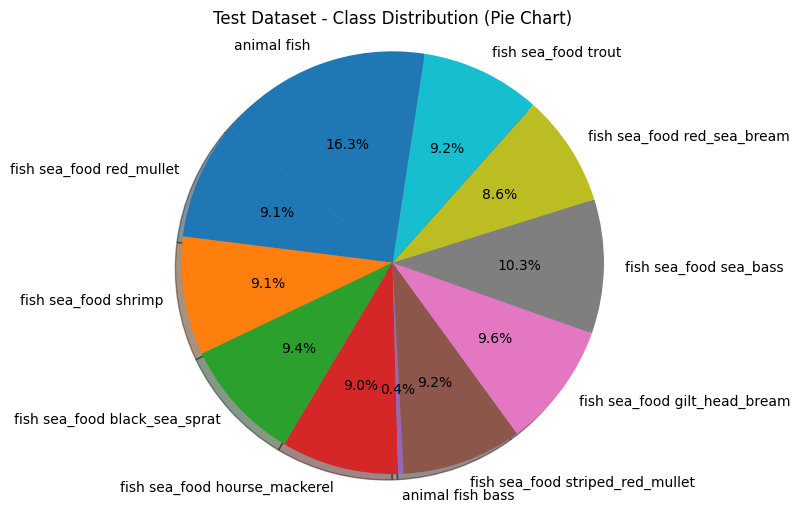

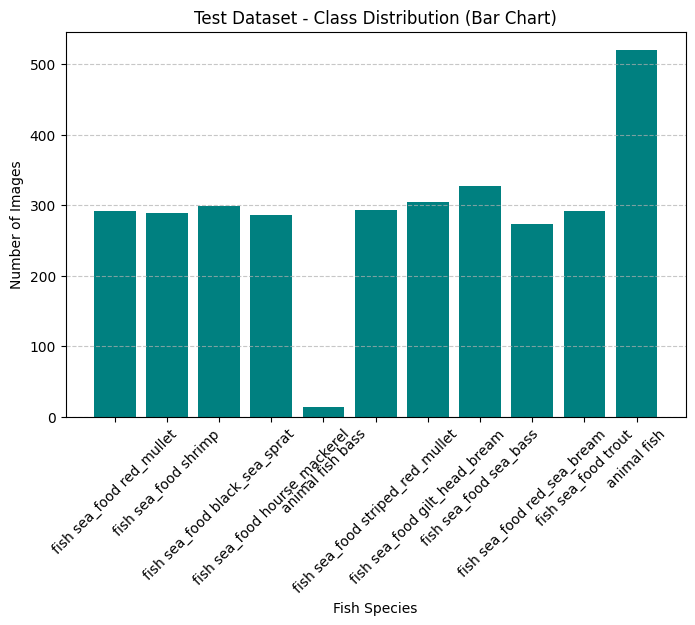

In [ ]:
# Define your dataset paths
data_paths = {
    "Train": "/content/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train",
    "Validation": "/content/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/val",
    "Test": "/content/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/test"
}

# Function to count images in each class folder
def get_class_counts(path):
    return {cls: len(os.listdir(os.path.join(path, cls))) for cls in os.listdir(path)}

# Loop through each dataset (Train, Val, Test)
for dataset_name, dataset_path in data_paths.items():

    print(f"\n===== {dataset_name} Dataset =====")

    class_counts = get_class_counts(dataset_path)
    labels = list(class_counts.keys())
    counts = list(class_counts.values())

    # ---------- Pie Chart ----------
    print()
    plt.figure(figsize=(6, 6))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, shadow=True)
    plt.title(f'{dataset_name} Dataset - Class Distribution (Pie Chart)')
    plt.axis('equal')
    plt.show()
    print()
    # ---------- Bar Chart ----------
    print()
    plt.figure(figsize=(8, 5))
    plt.bar(labels, counts, color='teal')
    plt.title(f'{dataset_name} Dataset - Class Distribution (Bar Chart)')
    plt.xlabel('Fish Species')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    print()

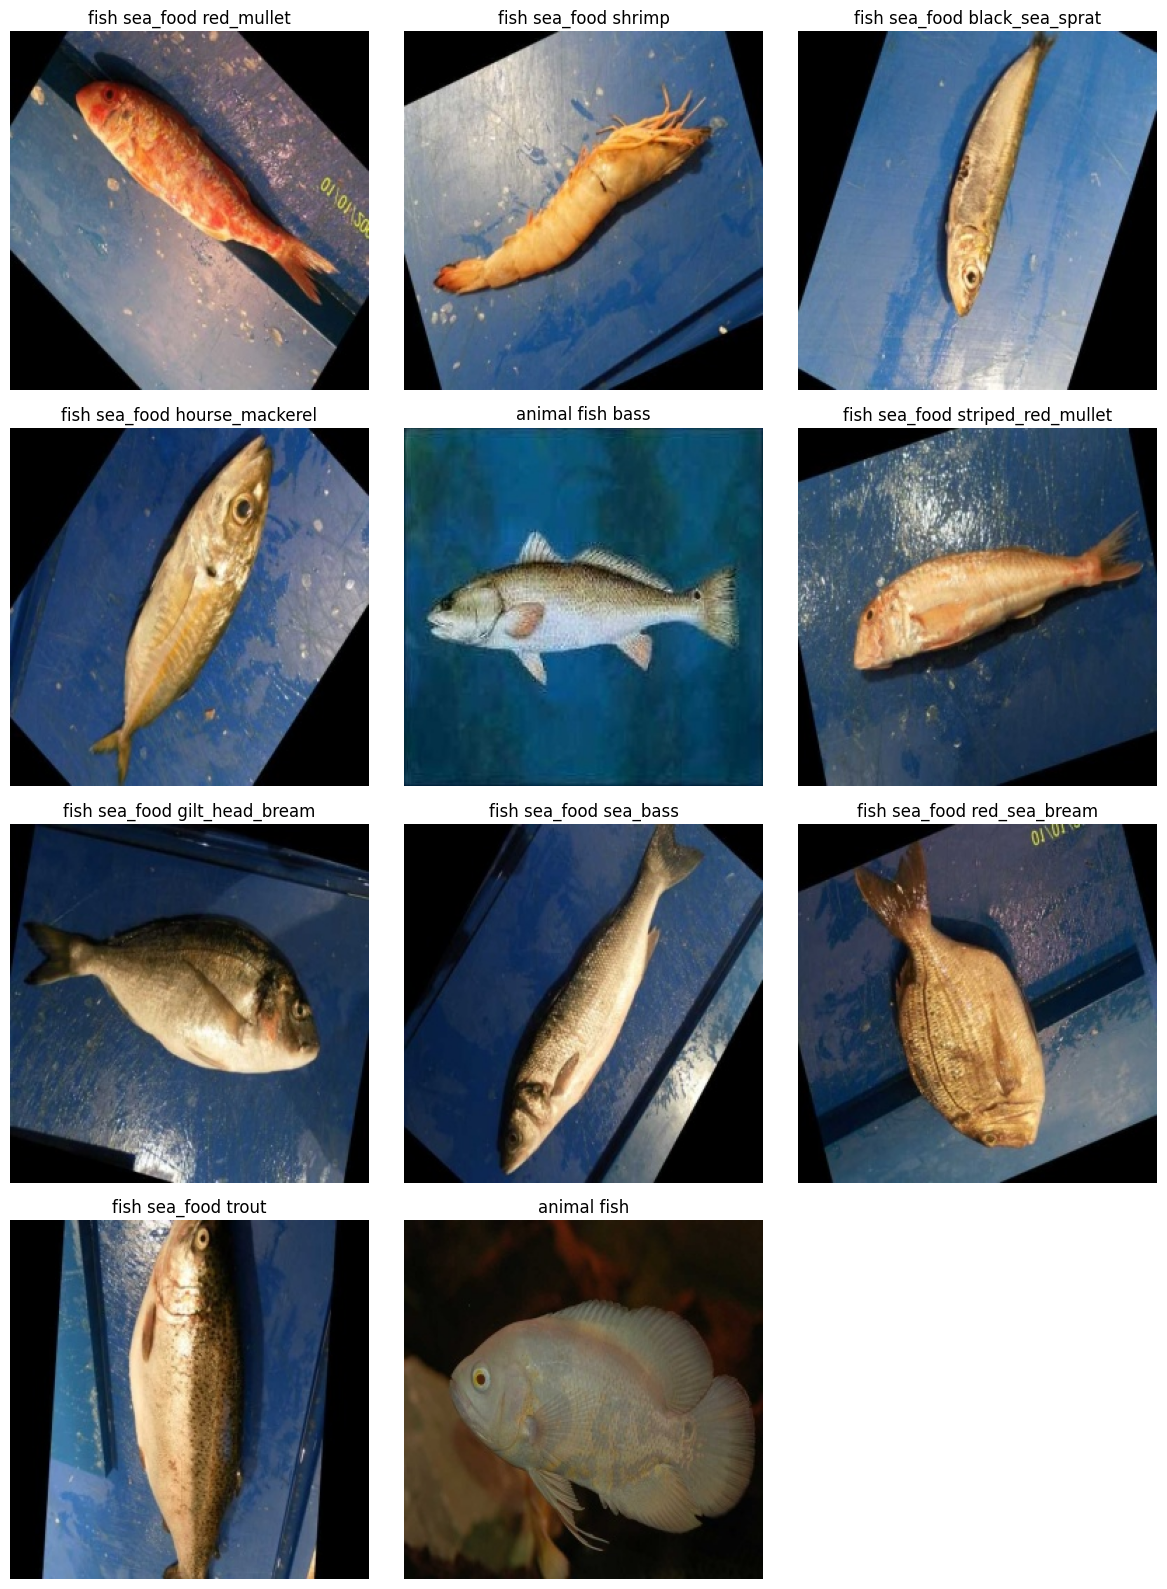

In [ ]:
train_path = '/content/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train'

# List all fish class folders
classes = [d for d in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, d))]
num_classes = len(classes)
cols = 3  # Number of columns you want
rows = math.ceil(num_classes / cols)  # Number of rows needed

plt.figure(figsize=(cols * 4, rows * 4))

for i, cls in enumerate(classes):
    class_folder = os.path.join(train_path, cls)
    images = [f for f in os.listdir(class_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if not images:
        print(f"No images found in class folder: {cls}")
        continue

    random_img_name = random.choice(images)
    random_img_path = os.path.join(class_folder, random_img_name)

    img = Image.open(random_img_path)
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:

Test_dir='/content/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/test'
Train_dir='/content/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train'
validate_dir='/content/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/val'


def count_images_per_class(folder_path):
    class_counts = {}
    for class_name in os.listdir(folder_path):
        class_folder = os.path.join(folder_path, class_name)
        if os.path.isdir(class_folder):
            count = len([f for f in os.listdir(class_folder) if os.path.isfile(os.path.join(class_folder, f))])
            class_counts[class_name] = count
    return class_counts

# Count images in each dataset
train_counts = count_images_per_class(Train_dir)
val_counts = count_images_per_class(validate_dir)
test_counts = count_images_per_class(Test_dir)

print("Train dataset image counts per class:")
for cls, count in train_counts.items():
    print(f"{cls}: {count}")

print("\nValidation dataset image counts per class:")
for cls, count in val_counts.items():
    print(f"{cls}: {count}")

print("\nTest dataset image counts per class:")
for cls, count in test_counts.items():
    print(f"{cls}: {count}")

Train dataset image counts per class:
fish sea_food red_mullet: 579
fish sea_food shrimp: 576
fish sea_food black_sea_sprat: 569
fish sea_food hourse_mackerel: 573
animal fish bass: 30
fish sea_food striped_red_mullet: 547
fish sea_food gilt_head_bream: 566
fish sea_food sea_bass: 538
fish sea_food red_sea_bream: 571
fish sea_food trout: 580
animal fish: 1096

Validation dataset image counts per class:
fish sea_food red_mullet: 90
fish sea_food shrimp: 100
fish sea_food black_sea_sprat: 105
fish sea_food hourse_mackerel: 97
animal fish bass: 10
fish sea_food striped_red_mullet: 101
fish sea_food gilt_head_bream: 94
fish sea_food sea_bass: 97
fish sea_food red_sea_bream: 113
fish sea_food trout: 98
animal fish: 187

Test dataset image counts per class:
fish sea_food red_mullet: 291
fish sea_food shrimp: 289
fish sea_food black_sea_sprat: 298
fish sea_food hourse_mackerel: 286
animal fish bass: 13
fish sea_food striped_red_mullet: 293
fish sea_food gilt_head_bream: 305
fish sea_food sea_

In [ ]:
 #Convert class_to_idx dictionary to DataFrame
 #Define your dataset path
train_path = '/content/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train'

# Create ImageFolder dataset
dataset = ImageFolder(root=train_path)

# Extract class_to_idx dictionary
class_to_idx = dataset.class_to_idx

# Convert to DataFrame
df = pd.DataFrame.from_dict(class_to_idx, orient='index', columns=['Index']).reset_index()
df = df.rename(columns={'index': 'Class'})

print(df)

                               Class  Index
0                        animal fish      0
1                   animal fish bass      1
2      fish sea_food black_sea_sprat      2
3      fish sea_food gilt_head_bream      3
4      fish sea_food hourse_mackerel      4
5           fish sea_food red_mullet      5
6        fish sea_food red_sea_bream      6
7             fish sea_food sea_bass      7
8               fish sea_food shrimp      8
9   fish sea_food striped_red_mullet      9
10               fish sea_food trout     10


In [ ]:
# ============ 4. DEFINE CNN MODEL FROM SCRATCH ============
def build_cnn_from_scratch():
    print("🧠 Building CNN model from scratch...")
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    print("✅ CNN model compiled.\n")
    return model



cnn_model_ = build_cnn_from_scratch()

🧠 Building CNN model from scratch...
✅ CNN model compiled.



Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6411 - loss: 1.2327
Epoch 1: val_accuracy improved from -inf to 0.95147, saving model to models/mobilenet_model.keras
195/195 ━━━━━━━━━━━━━━━━━━━━ 330s 2s/step - accuracy: 0.6419 - loss: 1.2302 - val_accuracy: 0.9515 - val_loss: 0.1466
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9368 - loss: 0.2145
Epoch 2: val_accuracy improved from 0.95147 to 0.97802, saving model to models/mobilenet_model.keras
195/195 ━━━━━━━━━━━━━━━━━━━━ 304s 2s/step - accuracy: 0.9368 - loss: 0.2144 - val_accuracy: 0.9780 - val_loss: 0.0690
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9630 - loss: 0.1252
Epoch 3: val_accuracy did not improve from 0.97802
195/195 ━━━━━━━━━━━━━━━━━━━━ 354s 2s/step - accuracy: 0.9630 - loss: 0.1252 - val_ac

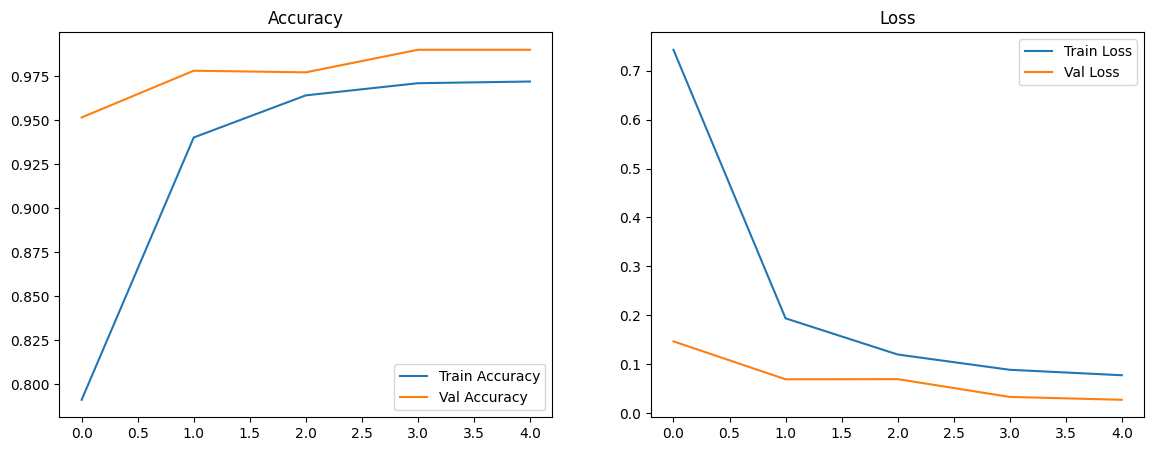

100/100 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step
📊 Classification Report:
                                  precision    recall  f1-score   support

                     animal fish       1.00      0.99      0.99       520
                animal fish bass       0.85      0.85      0.85        13
   fish sea_food black_sea_sprat       1.00      1.00      1.00       298
   fish sea_food gilt_head_bream       1.00      0.99      1.00       305
   fish sea_food hourse_mackerel       1.00      1.00      1.00       286
        fish sea_food red_mullet       1.00      0.99      0.99       291
     fish sea_food red_sea_bream       1.00      1.00      1.00       273
          fish sea_food sea_bass       1.00      1.00      1.00       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       0.99      0.99      0.99       293
             fish sea_food trout       0.99      1.00      1.00       292

                        accuracy           

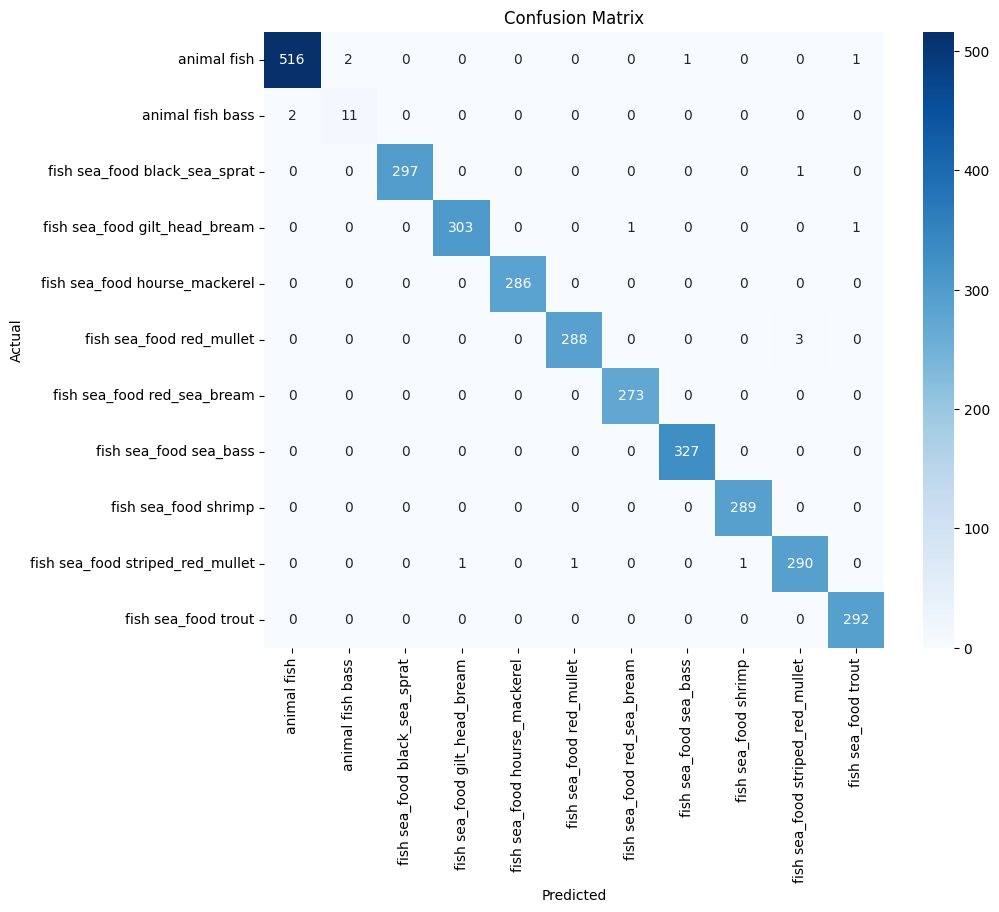

In [ ]:
# === Load Data ===
def load_data(data_dir, img_size=(224, 224), batch_size=32):
    train_dir = os.path.join(data_dir, 'train')
    val_dir = os.path.join(data_dir, 'val')
    test_dir = os.path.join(data_dir, 'test')

    datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)

    train_gen = datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')
    val_gen = datagen.flow_from_directory(val_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')
    test_gen = datagen.flow_from_directory(test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', shuffle=False)

    return train_gen, val_gen, test_gen

# === Class Weights ===
def get_class_weights(generator):
    labels = generator.classes
    classes = np.unique(labels)
    weights = compute_class_weight(class_weight='balanced', classes=classes, y=labels)
    return dict(zip(classes, weights))

# === Model ===
def build_mobilenet_model(input_shape, num_classes):
    base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=input_shape)
    base_model.trainable = False
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# === Train Model ===
def train_mobilenet(data_dir, model_path='models/mobilenet_model.keras', img_size=(224, 224), batch_size=32, epochs=10):
    train_gen, val_gen, test_gen = load_data(data_dir, img_size, batch_size)
    class_weights = get_class_weights(train_gen)

    model = build_mobilenet_model((*img_size, 3), train_gen.num_classes)
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    os.makedirs('models', exist_ok=True)
    checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', save_best_only=True, verbose=1)

    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=epochs,
        class_weight=class_weights,
        callbacks=[checkpoint]
    )

    return model, history, test_gen

# === Plot Training History ===
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Train Accuracy')
    plt.plot(epochs, val_acc, label='Val Accuracy')
    plt.legend()
    plt.title('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Train Loss')
    plt.plot(epochs, val_loss, label='Val Loss')
    plt.legend()
    plt.title('Loss')
    plt.show()

# === Evaluation ===
def evaluate_model(model, test_gen):
    y_pred_probs = model.predict(test_gen)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = test_gen.classes
    class_labels = list(test_gen.class_indices.keys())

    print("📊 Classification Report:")
    print(classification_report(y_true, y_pred, target_names=class_labels))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# === Run Training & Evaluation ===
if __name__ == '__main__':
    DATA_DIR = r'/content/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data'
    model, history, test_gen = train_mobilenet(DATA_DIR, epochs=5)
    plot_training_history(history)
    evaluate_model(model, test_gen)


Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6428 - loss: 1.2210
Epoch 1: val_accuracy improved from -inf to 0.95147, saving model to models/mobilenet_model.keras
195/195 ━━━━━━━━━━━━━━━━━━━━ 357s 2s/step - accuracy: 0.6436 - loss: 1.2183 - val_accuracy: 0.9515 - val_loss: 0.1622
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9315 - loss: 0.2055
Epoch 2: val_accuracy improved from 0.95147 to 0.97161, saving model to models/mobilenet_model.keras
195/195 ━━━━━━━━━━━━━━━━━━━━ 303s 2s/step - accuracy: 0.9315 - loss: 0.2055 - val_accuracy: 0.9716 - val_loss: 0.0927
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9446 - loss: 0.1565
Epoch 3: val_accuracy improved from 0.97161 to 0.98352, saving model to models/mobilenet_model.keras
195/195 ━━━━━━━━━━━━━━━━━━━━ 302s 2s/step - accuracy: 0.9447 - loss: 0.1565 - val_a

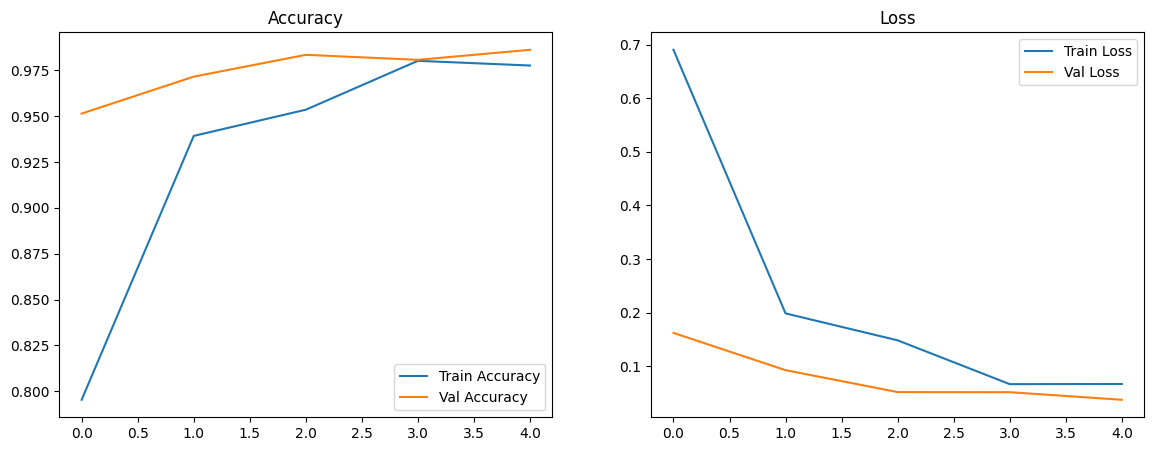

100/100 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step
📊 Classification Report:
                                  precision    recall  f1-score   support

                     animal fish       1.00      0.97      0.99       520
                animal fish bass       0.50      0.92      0.65        13
   fish sea_food black_sea_sprat       1.00      1.00      1.00       298
   fish sea_food gilt_head_bream       1.00      1.00      1.00       305
   fish sea_food hourse_mackerel       1.00      0.99      0.99       286
        fish sea_food red_mullet       1.00      0.99      0.99       291
     fish sea_food red_sea_bream       1.00      1.00      1.00       273
          fish sea_food sea_bass       1.00      1.00      1.00       327
            fish sea_food shrimp       0.99      1.00      1.00       289
fish sea_food striped_red_mullet       0.98      0.99      0.98       293
             fish sea_food trout       1.00      1.00      1.00       292

                        accuracy           

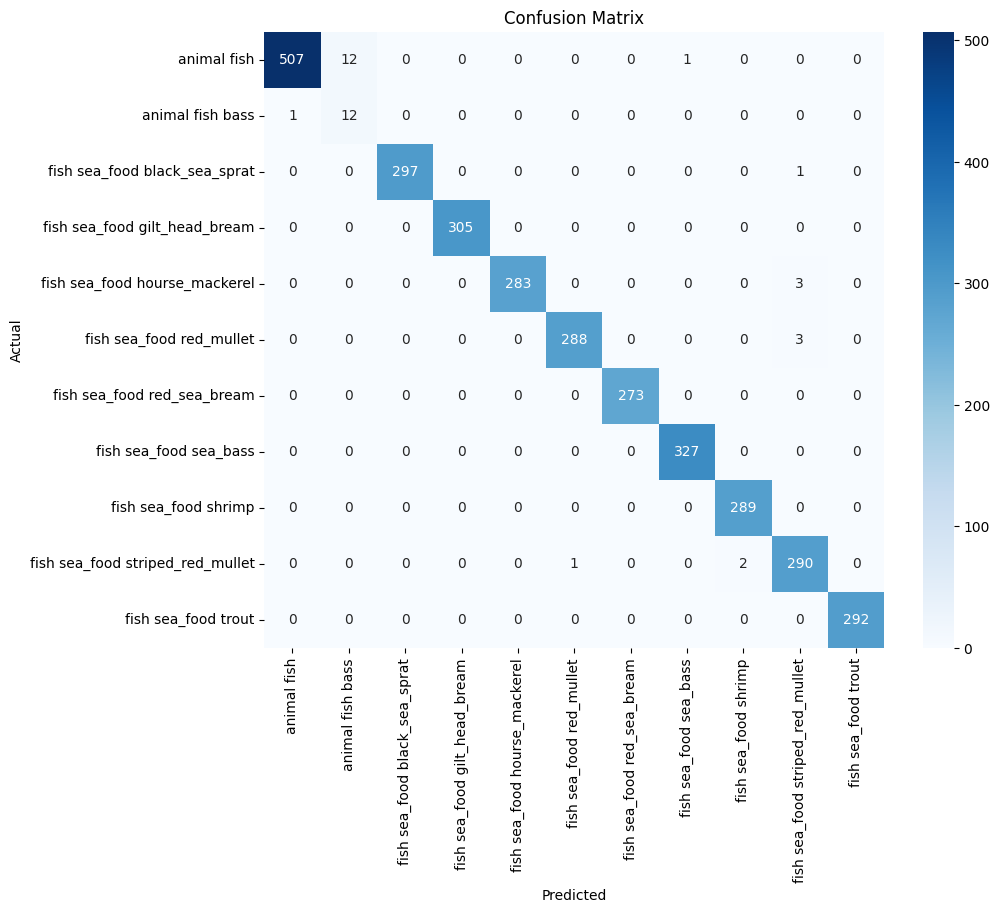

In [ ]:
# === Load Data ===
def load_data(data_dir, img_size=(224, 224), batch_size=32):
    train_dir = os.path.join(data_dir, 'train')
    val_dir = os.path.join(data_dir, 'val')
    test_dir = os.path.join(data_dir, 'test')

    datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)

    train_gen = datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')
    val_gen = datagen.flow_from_directory(val_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')
    test_gen = datagen.flow_from_directory(test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', shuffle=False)

    return train_gen, val_gen, test_gen

# === Class Weights ===
def get_class_weights(generator):
    labels = generator.classes
    classes = np.unique(labels)
    weights = compute_class_weight(class_weight='balanced', classes=classes, y=labels)
    return dict(zip(classes, weights))

# === Model ===
def build_mobilenet_model(input_shape, num_classes):
    base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=input_shape)
    base_model.trainable = False
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# === Train Model ===
def train_mobilenet(data_dir, model_path='models/mobilenet_model.keras', img_size=(224, 224), batch_size=32, epochs=10):
    train_gen, val_gen, test_gen = load_data(data_dir, img_size, batch_size)
    class_weights = get_class_weights(train_gen)

    model = build_mobilenet_model((*img_size, 3), train_gen.num_classes)
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    os.makedirs('models', exist_ok=True)
    checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', save_best_only=True, verbose=1)

    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=epochs,
        class_weight=class_weights,
        callbacks=[checkpoint]
    )

    return model, history, test_gen

# === Plot Training History ===
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Train Accuracy')
    plt.plot(epochs, val_acc, label='Val Accuracy')
    plt.legend()
    plt.title('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Train Loss')
    plt.plot(epochs, val_loss, label='Val Loss')
    plt.legend()
    plt.title('Loss')
    plt.show()

# === Evaluation ===
def evaluate_model(model, test_gen):
    y_pred_probs = model.predict(test_gen)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = test_gen.classes
    class_labels = list(test_gen.class_indices.keys())

    print("📊 Classification Report:")
    print(classification_report(y_true, y_pred, target_names=class_labels))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# === Run Training & Evaluation ===
if __name__ == '__main__':
    DATA_DIR = r'/content/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data'
    model, history, test_gen = train_mobilenet(DATA_DIR, epochs=5)
    plot_training_history(history)
    evaluate_model(model, test_gen)

🧩Build and Compile All Transfer Learning Models

In [ ]:
# ============ 🧩 5: BUILD AND COMPILE TRANSFER LEARNING MODELS ============

print("\n🔧 Initializing Transfer Learning Models...\n")

# Dictionary to hold model objects
built_models = {}

# List of pretrained architectures to iterate through
pretrained_models = ["VGG16", "ResNet50", "MobileNet", "InceptionV3", "EfficientNetB0"]

for base_model_name in pretrained_models:
    print(f"🧩 Building transfer learning model: {base_model_name}...")

    # Select appropriate base model
    base_models = {
        "VGG16": VGG16,
        "ResNet50": ResNet50,
        "MobileNet": MobileNet,
        "InceptionV3": InceptionV3,
        "EfficientNetB0": EfficientNetB0
    }

    base_model = base_models[base_model_name](
        weights='imagenet',
        include_top=False,
        input_shape=(224, 224, 3)
    )
    base_model.trainable = False  # Freeze layers

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.0001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    built_models[base_model_name] = model
    print(f"✅ {base_model_name} model compiled successfully.\n")

print("🏁 All transfer learning models are built and compiled!\n")



🔧 Initializing Transfer Learning Models...

🧩 Building transfer learning model: VGG16...
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
✅ VGG16 model compiled successfully.

🧩 Building transfer learning model: ResNet50...
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
✅ ResNet50 model compiled successfully.

🧩 Building transfer learning model: MobileNet...
17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
✅ MobileNet model compiled successfully.

🧩 Building transfer learning model: InceptionV3...
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
✅ InceptionV3 model compiled successfully.

🧩 Building transfer learning model: EfficientNetB0...
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
✅ EfficientNetB0 model compiled successfully.

🏁 All transfer learning models are built and compiled!



🚀 Train and Evaluate Each Model

🧩  Train Only VGG16

In [ ]:
# ============ 🚀 6: TRAIN AND EVALUATE EACH MODEL ============
# ============ 🚀 TRAIN: VGG16 MODEL ============
results = {}

model_name = "VGG16"
model = built_models[model_name]

print(f"\n{'='*25} TRAINING {model_name} {'='*25}")
start_time = time.time()

callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True),
    ModelCheckpoint(f"{model_name}_best_model.h5", monitor='val_accuracy', save_best_only=True)
]

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5,                   # 🔹 Reduce epochs for faster testing
    steps_per_epoch=100,        # 🔹 Optional: limit per-epoch batches
    validation_steps=30,        # 🔹 Optional: limit validation steps
    callbacks=callbacks,
    verbose=1
)

duration = time.time() - start_time
test_loss, test_acc = model.evaluate(test_generator)

results[model_name] = {
    "accuracy": test_acc * 100,
    "training_time_min": round(duration/60, 2),
    "history": history
}

print(f"\n✅ {model_name} Test Accuracy: {test_acc*100:.2f}% in {duration/60:.2f} min.")
print("💾 Saved model as VGG16_best_model.h5\n")



========================= TRAINING VGG16 =========================
Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 17s/step - accuracy: 0.1363 - loss: 2.4141 

100/100 ━━━━━━━━━━━━━━━━━━━━ 2134s 21s/step - accuracy: 0.1367 - loss: 2.4131 - val_accuracy: 0.2635 - val_loss: 2.0732
Epoch 2/5
 95/100 ━━━━━━━━━━━━━━━━━━━━ 1:19 16s/step - accuracy: 0.2774 - loss: 2.1025

100/100 ━━━━━━━━━━━━━━━━━━━━ 1996s 20s/step - accuracy: 0.2776 - loss: 2.1010 - val_accuracy: 0.5042 - val_loss: 1.8933
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 16s/step - accuracy: 0.3291 - loss: 1.9480 

100/100 ━━━━━━━━━━━━━━━━━━━━ 2131s 21s/step - accuracy: 0.3292 - loss: 1.9477 - val_accuracy: 0.6219 - val_loss: 1.7623
Epoch 4/5
 95/100 ━━━━━━━━━━━━━━━━━━━━ 1:20 16s/step - accuracy: 0.4009 - loss: 1.8130

100/100 ━━━━━━━━━━━━━━━━━━━━ 2057s 21s/step - accuracy: 0.4016 - loss: 1.8115 - val_accuracy: 0.6812 - val_loss: 1.6445
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 2119s 21s/step - accuracy: 0.4547 - loss: 1.7062 - val_accuracy: 0.6635 - val_loss: 1.5398
100/100 ━━━━━━━━━━━━━━━━━━━━ 1567s 16s/step - accuracy: 0.8084 - loss: 1.2317

✅ VGG16 Test Accuracy: 70.69% in 174.47 min.
💾 Saved model as VGG16_best_model.h5



🚀 — Train ResNet50

In [ ]:
# ============ 🚀 TRAIN: ResNet50 MODEL ============
model_name = "ResNet50"
model = built_models[model_name]

print(f"\n{'='*25} TRAINING {model_name} {'='*25}")
start_time = time.time()

callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True),
    ModelCheckpoint(f"{model_name}_best_model.h5", monitor='val_accuracy', save_best_only=True)
]

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5,
    steps_per_epoch=100,
    validation_steps=30,
    callbacks=callbacks,
    verbose=1
)

duration = time.time() - start_time
test_loss, test_acc = model.evaluate(test_generator)

results[model_name] = {
    "accuracy": test_acc * 100,
    "training_time_min": round(duration/60, 2),
    "history": history
}

print(f"\n✅ {model_name} Test Accuracy: {test_acc*100:.2f}% in {duration/60:.2f} min.")
print("💾 Saved model as ResNet50_best_model.h5\n")



========================= TRAINING ResNet50 =========================
Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.1183 - loss: 2.6663

100/100 ━━━━━━━━━━━━━━━━━━━━ 670s 7s/step - accuracy: 0.1185 - loss: 2.6650 - val_accuracy: 0.1656 - val_loss: 2.2756
Epoch 2/5
 95/100 ━━━━━━━━━━━━━━━━━━━━ 25s 5s/step - accuracy: 0.1549 - loss: 2.3626

100/100 ━━━━━━━━━━━━━━━━━━━━ 636s 6s/step - accuracy: 0.1553 - loss: 2.3616 - val_accuracy: 0.1708 - val_loss: 2.2433
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.1810 - loss: 2.2893

100/100 ━━━━━━━━━━━━━━━━━━━━ 660s 7s/step - accuracy: 0.1810 - loss: 2.2893 - val_accuracy: 0.1740 - val_loss: 2.2158
Epoch 4/5
 95/100 ━━━━━━━━━━━━━━━━━━━━ 25s 5s/step - accuracy: 0.1969 - loss: 2.2387

100/100 ━━━━━━━━━━━━━━━━━━━━ 627s 6s/step - accuracy: 0.1963 - loss: 2.2385 - val_accuracy: 0.1823 - val_loss: 2.1913
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.2027 - loss: 2.2236

100/100 ━━━━━━━━━━━━━━━━━━━━ 740s 7s/step - accuracy: 0.2027 - loss: 2.2236 - val_accuracy: 0.2083 - val_loss: 2.1844
100/100 ━━━━━━━━━━━━━━━━━━━━ 475s 5s/step - accuracy: 0.3972 - loss: 2.0037

✅ ResNet50 Test Accuracy: 17.82% in 56.54 min.
💾 Saved model as ResNet50_best_model.h5



🚀  — Train MobileNet

In [ ]:
# ============ 🚀 TRAIN: MobileNet MODEL ============
model_name = "MobileNet"
model = built_models[model_name]

print(f"\n{'='*25} TRAINING {model_name} {'='*25}")
start_time = time.time()

callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True),
    ModelCheckpoint(f"{model_name}_best_model.h5", monitor='val_accuracy', save_best_only=True)
]

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5,
    steps_per_epoch=100,
    validation_steps=30,
    callbacks=callbacks,
    verbose=1
)

duration = time.time() - start_time
test_loss, test_acc = model.evaluate(test_generator)

results[model_name] = {
    "accuracy": test_acc * 100,
    "training_time_min": round(duration/60, 2),
    "history": history
}

print(f"\n✅ {model_name} Test Accuracy: {test_acc*100:.2f}% in {duration/60:.2f} min.")
print("💾 Saved model as MobileNet_best_model.h5\n")



========================= TRAINING MobileNet =========================
Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9171 - loss: 0.2881

100/100 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - accuracy: 0.9172 - loss: 0.2879 - val_accuracy: 0.9729 - val_loss: 0.1501
Epoch 2/5
 95/100 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.9267 - loss: 0.2376

100/100 ━━━━━━━━━━━━━━━━━━━━ 189s 2s/step - accuracy: 0.9271 - loss: 0.2373 - val_accuracy: 0.9792 - val_loss: 0.1066
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 257s 2s/step - accuracy: 0.9297 - loss: 0.2230 - val_accuracy: 0.9792 - val_loss: 0.0960
Epoch 4/5
 95/100 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.9506 - loss: 0.1746

100/100 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 0.9507 - loss: 0.1745 - val_accuracy: 0.9812 - val_loss: 0.0755
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9530 - loss: 0.1776

100/100 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step - accuracy: 0.9530 - loss: 0.1775 - val_accuracy: 0.9875 - val_loss: 0.0660
100/100 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.9864 - loss: 0.0579

✅ MobileNet Test Accuracy: 98.65% in 18.13 min.
💾 Saved model as MobileNet_best_model.h5



🚀 — Train InceptionV3

In [ ]:
# ============ 🚀 TRAIN: InceptionV3 MODEL ============
model_name = "InceptionV3"
model = built_models[model_name]

print(f"\n{'='*25} TRAINING {model_name} {'='*25}")
start_time = time.time()

callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True),
    ModelCheckpoint(f"{model_name}_best_model.h5", monitor='val_accuracy', save_best_only=True)
]

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5,
    steps_per_epoch=100,
    validation_steps=30,
    callbacks=callbacks,
    verbose=1
)

duration = time.time() - start_time
test_loss, test_acc = model.evaluate(test_generator)

results[model_name] = {
    "accuracy": test_acc * 100,
    "training_time_min": round(duration/60, 2),
    "history": history
}

print(f"\n✅ {model_name} Test Accuracy: {test_acc*100:.2f}% in {duration/60:.2f} min.")
print("💾 Saved model as InceptionV3_best_model.h5\n")



========================= TRAINING InceptionV3 =========================
Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3239 - loss: 2.1266

100/100 ━━━━━━━━━━━━━━━━━━━━ 473s 5s/step - accuracy: 0.3256 - loss: 2.1210 - val_accuracy: 0.8302 - val_loss: 0.6973
Epoch 2/5
 95/100 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.7376 - loss: 0.8321

100/100 ━━━━━━━━━━━━━━━━━━━━ 442s 4s/step - accuracy: 0.7388 - loss: 0.8277 - val_accuracy: 0.9094 - val_loss: 0.4142
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8188 - loss: 0.5703

100/100 ━━━━━━━━━━━━━━━━━━━━ 502s 5s/step - accuracy: 0.8189 - loss: 0.5701 - val_accuracy: 0.9135 - val_loss: 0.3409
Epoch 4/5
 95/100 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.8540 - loss: 0.4624

100/100 ━━━━━━━━━━━━━━━━━━━━ 442s 4s/step - accuracy: 0.8540 - loss: 0.4624 - val_accuracy: 0.9312 - val_loss: 0.2791
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 510s 5s/step - accuracy: 0.8711 - loss: 0.4282 - val_accuracy: 0.9292 - val_loss: 0.2676
100/100 ━━━━━━━━━━━━━━━━━━━━ 324s 3s/step - accuracy: 0.9608 - loss: 0.2191

✅ InceptionV3 Test Accuracy: 94.63% in 39.48 min.
💾 Saved model as InceptionV3_best_model.h5



🚀 — Train EfficientNetB0

In [ ]:
# ============ 🚀 TRAIN: EfficientNetB0 MODEL ============
model_name = "EfficientNetB0"
model = built_models[model_name]

print(f"\n{'='*25} TRAINING {model_name} {'='*25}")
start_time = time.time()

callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True),
    ModelCheckpoint(f"{model_name}_best_model.h5", monitor='val_accuracy', save_best_only=True)
]

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5,
    steps_per_epoch=100,
    validation_steps=30,
    callbacks=callbacks,
    verbose=1
)

duration = time.time() - start_time
test_loss, test_acc = model.evaluate(test_generator)

results[model_name] = {
    "accuracy": test_acc * 100,
    "training_time_min": round(duration/60, 2),
    "history": history
}

print(f"\n✅ {model_name} Test Accuracy: {test_acc*100:.2f}% in {duration/60:.2f} min.")
print("💾 Saved model as EfficientNetB0_best_model.h5\n")



========================= TRAINING EfficientNetB0 =========================
Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1494 - loss: 2.3577

100/100 ━━━━━━━━━━━━━━━━━━━━ 315s 3s/step - accuracy: 0.1495 - loss: 2.3575 - val_accuracy: 0.1656 - val_loss: 2.3237
Epoch 2/5
 95/100 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.1598 - loss: 2.3285

100/100 ━━━━━━━━━━━━━━━━━━━━ 320s 3s/step - accuracy: 0.1599 - loss: 2.3284 - val_accuracy: 0.1719 - val_loss: 2.3141
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 323s 3s/step - accuracy: 0.1676 - loss: 2.3271 - val_accuracy: 0.1698 - val_loss: 2.3125
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 279s 3s/step - accuracy: 0.1724 - loss: 2.3137 - val_accuracy: 0.1604 - val_loss: 2.3215
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 317s 3s/step - accuracy: 0.1819 - loss: 2.3060 - val_accuracy: 0.1719 - val_loss: 2.3134
100/100 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.4507 - loss: 2.1326

✅ EfficientNetB0 Test Accuracy: 16.32% in 25.93 min.
💾 Saved model as EfficientNetB0_best_model.h5



✅  — Combine Results

In [ ]:
import pandas as pd

summary = pd.DataFrame([
    {"Model": name, "Accuracy (%)": m["accuracy"], "Training Time (min)": m["training_time_min"]}
    for name, m in results.items()
])
display(summary)


📈Visualize Accuracy and Loss for Each Model


📊 Visualizing training history for all models...



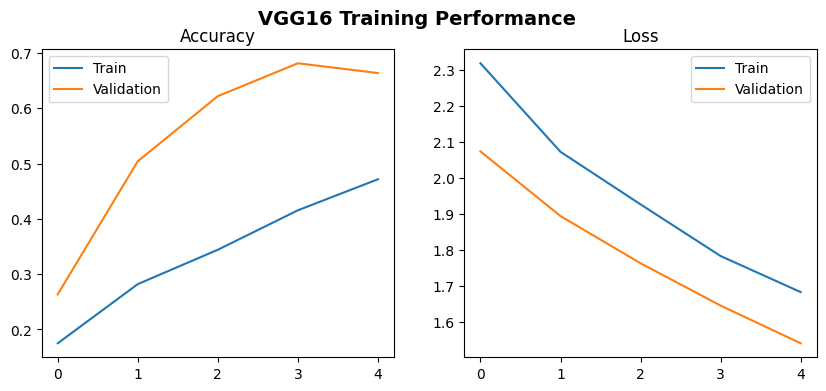

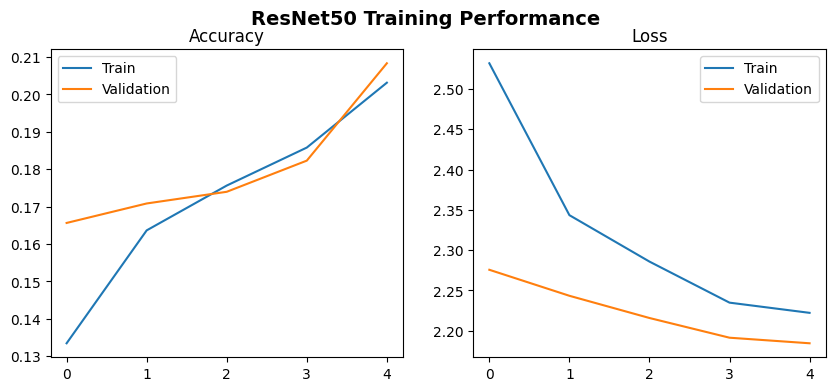

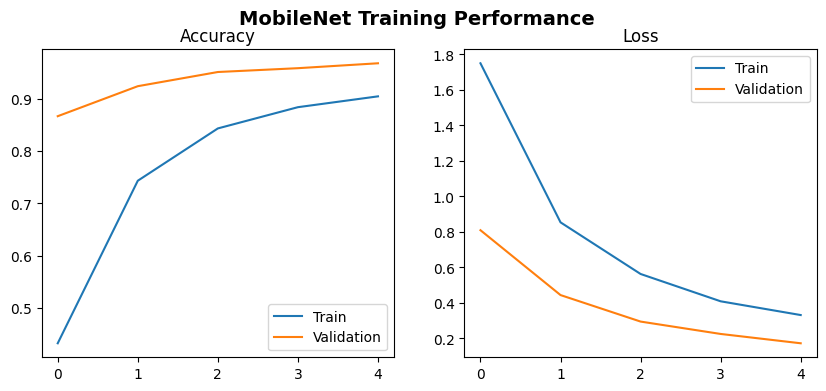

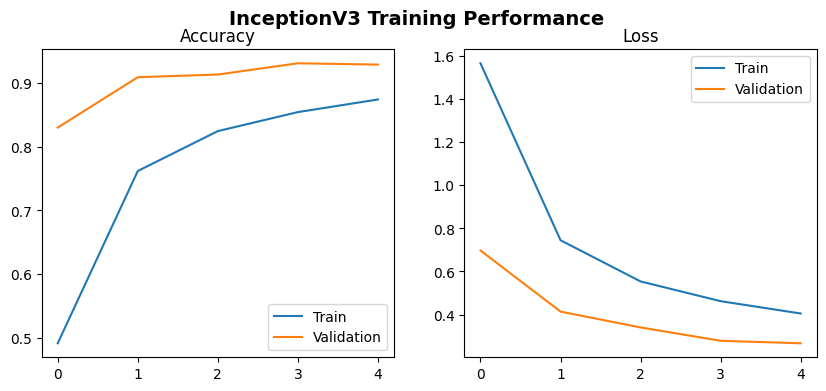

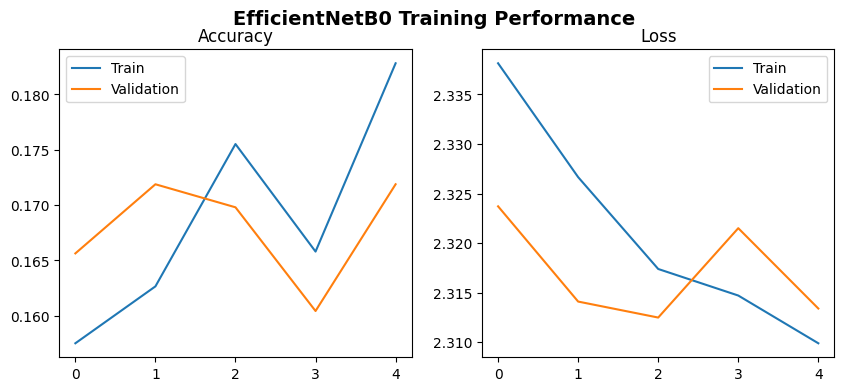

✅ All accuracy and loss plots generated.



In [ ]:
# ============ 📈 7: VISUALIZE ACCURACY AND LOSS ============

print("\n📊 Visualizing training history for all models...\n")

for model_name, info in results.items():
    history = info["history"]

    plt.figure(figsize=(10, 4))
    plt.suptitle(f"{model_name} Training Performance", fontsize=14, fontweight='bold')

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title('Loss')
    plt.legend()

    plt.show()

print("✅ All accuracy and loss plots generated.\n")


📊  Compare Model Performance


📈 Model Comparison Summary:

VGG16          : 70.69% accuracy, Training time: 174.47 min
ResNet50       : 17.82% accuracy, Training time: 56.54 min
MobileNet      : 97.74% accuracy, Training time: 17.12 min
InceptionV3    : 94.63% accuracy, Training time: 39.48 min
EfficientNetB0 : 16.32% accuracy, Training time: 25.93 min


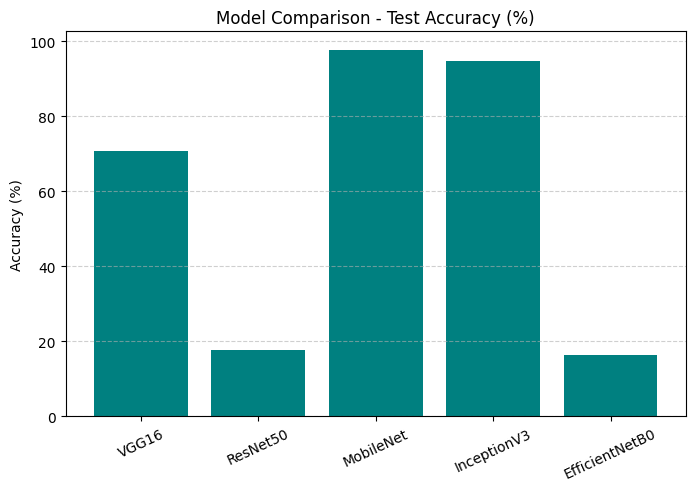


🏁 Comparison completed successfully!



In [ ]:
# ============ 📊 8: COMPARE MODEL PERFORMANCE ============

print("\n📈 Model Comparison Summary:\n")

for model_name, metrics in results.items():
    print(f"{model_name:<15}: {metrics['accuracy']:.2f}% accuracy, "
          f"Training time: {metrics['training_time_min']:.2f} min")

# Plot model comparison
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), [v["accuracy"] for v in results.values()], color='teal')
plt.title("Model Comparison - Test Accuracy (%)")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=25)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

print("\n🏁 Comparison completed successfully!\n")


💾  Save the Best Model for Deployment

In [ ]:
# ============ 💾SAVE BEST MODEL FOR DEPLOYMENT ============

best_model_name = max(results, key=lambda x: results[x]["accuracy"])
best_acc = results[best_model_name]["accuracy"]

print(f"\n🏆 Best Model: {best_model_name} with {best_acc:.2f}% accuracy.")
print(f"💾 Saving best model as {best_model_name}_best_model.h5")

best_model = built_models[best_model_name]
best_model.save(f"{best_model_name}_best_model.h5")

print("✅ Model saved successfully! Ready for Streamlit deployment.\n")



🏆 Best Model: MobileNet with 97.74% accuracy.
💾 Saving best model as MobileNet_best_model.h5
✅ Model saved successfully! Ready for Streamlit deployment.



✅ : Export Results to CSV

In [ ]:
# ============ 📂EXPORT RESULTS TO CSV ============

import pandas as pd

df_results = pd.DataFrame([
    {"Model": name,
     "Accuracy (%)": metrics["accuracy"],
     "Training Time (min)": metrics["training_time_min"]}
    for name, metrics in results.items()
])

df_results.to_csv("transfer_learning_results.csv", index=False)
print("📁 Results exported to transfer_learning_results.csv successfully!")
display(df_results)


📁 Results exported to transfer_learning_results.csv successfully!


Model  Accuracy (%)  Training Time (min)
0           VGG16     70.693439               174.47
1        ResNet50     17.822404                56.54
2       MobileNet     97.740823                17.12
3     InceptionV3     94.634455                39.48
4  EfficientNetB0     16.316284                25.93

DATASET_DIR = 'C:/Users/keert/OneDrive/Desktop/Guvi-project/Multiclass fish classification/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/test'  

Trained_model_path='C:/Users/keert/OneDrive/Desktop/Guvi-project/Multiclass fish classification/transfer_learning_results.csv'

data_paths = {
    "Train": "C:/Users/keert/OneDrive/Desktop/Guvi-project/Multiclass fish classification/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train",
    "Validation": "C:/Users/keert/OneDrive/Desktop/Guvi-project/Multiclass fish classification/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/val",
    "Test": "C:/Users/keert/OneDrive/Desktop/Guvi-project/Multiclass fish classification/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/test"
}



MODEL_PATHS = {
    'VGG16': 'C:/Users/keert/OneDrive/Desktop/Guvi-project/Multiclass fish classification/VGG16_best_model.h5',
    'ResNet50': 'C:/Users/keert/OneDrive/Desktop/Guvi-project/Multiclass fish classification/ResNet50_best_model.h5',
    'MobileNet': 'C:/Users/keert/OneDrive/Desktop/Guvi-project/Multiclass fish classification/MobileNet_best_model.h5',
    'InceptionV3': 'C:/Users/keert/OneDrive/Desktop/Guvi-project/Multiclass fish classification/InceptionV3_best_model.h5',
    'EfficientNetB0': 'C:/Users/keert/OneDrive/Desktop/Guvi-project/Multiclass fish classification/EfficientNetB0_best_model.h5',
}

FISH_CLASSES:
fish sea_food black_sea_sprat,
fish sea_food hourse_mackerel,
fish sea_food red_mullet,
fish sea_food striped_red_mullet,
fish sea_food trout,
animal fish bass,
animal fish,
fish sea_food sea_bass,
fish sea_food shrimp,
fish sea_food red_sea_bream,
fish sea_food gilt_head_bream.

In [ ]:
data_paths = {
    "Train": "/content/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train",
    "Validation": "/content/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/val",
    "Test": "/content/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/test"
}

In [ ]:
DATASET_DIR = 'C:/Users/keert/OneDrive/Desktop/Guvi-project/Multiclass fish classification/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/test'

Trained_model_path='C:/Users/keert/OneDrive/Desktop/Guvi-project/Multiclass fish classification/transfer_learning_results.csv'

data_paths = {
    "Train": "C:/Users/keert/OneDrive/Desktop/Guvi-project/Multiclass fish classification/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/train",
    "Validation": "C:/Users/keert/OneDrive/Desktop/Guvi-project/Multiclass fish classification/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/val",
    "Test": "C:/Users/keert/OneDrive/Desktop/Guvi-project/Multiclass fish classification/Dataset/images.cv_jzk6llhf18tm3k0kyttxz/data/test"
}



MODEL_PATHS = {
    'VGG16': 'C:/Users/keert/OneDrive/Desktop/Guvi-project/Multiclass fish classification/VGG16_best_model.h5',
    'ResNet50': 'C:/Users/keert/OneDrive/Desktop/Guvi-project/Multiclass fish classification/ResNet50_best_model.h5',
    'MobileNet': 'C:/Users/keert/OneDrive/Desktop/Guvi-project/Multiclass fish classification/MobileNet_best_model.h5',
    'InceptionV3': 'C:/Users/keert/OneDrive/Desktop/Guvi-project/Multiclass fish classification/InceptionV3_best_model.h5',
    'EfficientNetB0': 'C:/Users/keert/OneDrive/Desktop/Guvi-project/Multiclass fish classification/EfficientNetB0_best_model.h5',
}

FISH_CLASSES:
fish sea_food black_sea_sprat,
fish sea_food hourse_mackerel,
fish sea_food red_mullet,
fish sea_food striped_red_mullet,
fish sea_food trout,
animal fish bass,
animal fish,
fish sea_food sea_bass,
fish sea_food shrimp,
fish sea_food red_sea_bream,
fish sea_food gilt_head_bream.